In [1]:
# Import libraries:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [83]:
# Function that calculates the discount-rates sum:
def deltasumlog(i, n, delta):
    output = []
    while i <= n:
        otemp = delta**i
        output += [otemp]
        i += 1
    return sum(output)

def deltasumsqrt(i, n, delta):
    output = []
    while i <=n:
        otemp = (delta**(2*i))
        output += [otemp]
        i += 1
    return sum(output)


# Function that calculates the quality-yield of a certain amount of effort:
def qualitycalc(effort):
    threshold = 0.70
    if  effort <= threshold:
        quality = effort / threshold
    #elif effort > -0.5 and effort < 0.5:
    elif effort > threshold and effort <= 1:
        quality = (1/(1-threshold))*(1-effort)
    else:
        quality = 0
    return quality


# def uncertainscope(w, contlist):
#     contributionratio = 
#     return w + xi*w*(1 - )

# Function that calculates all Efforts in all periods for a certain deadline
# Parameters: induced deadline, output plots?, type of utility function, print contributions?
def contributioncalc(deadline, plots, uftype, printcontri, showcleanplot):    
    strtemp = f"df_{deadline}"
    locals()[strtemp] = pd.DataFrame()

    period = 0
    j = 0
    indexlist = []
    while j <= deadline:
        indexlist += [j]
        j += 1
    locals()[strtemp]['Period'] = indexlist

    locals()[strtemp]['Period'] = indexlist

    while period <= deadline:
        contlist = []
        i = period
        z = 0
        v = 1
        while z < period:
            contlist += [locals()[strtemp].iloc[z,v]]
            z += 1
            v += 1

        if uftype == "log":
            cont = 1 - ( ( (deadline + 1 - i) - (w + xi*w*(1-(1-(w-sum(contlist))/w)**(1/kappa)) - sum(contlist)) ) / (1 + beta * deltasumlog(1, deadline - i,delta)) )
        if uftype == "sqrt":
            cont = 1 - ( ( (deadline + 1 - i) - (w + xi*w*(1-(1-(w-sum(contlist))/w)**(1/kappa)) - sum(contlist)) ) / (1 + (beta**2) * deltasumsqrt(1, deadline - i, delta)) )

        contlist += [cont]
        i += 1

        while i <= deadline:
            if uftype == "log":
                calcu = (1-(1-cont)*(beta*(delta**(i-period))))
            if uftype == "sqrt":
                calcu = (1-(1-cont)*((beta**2)*(delta**(2*(i-period)))))

            contlist += [calcu]
            i += 1
        
        if printcontri == True:
            print(f"Period {period}: {contlist}, {sum(contlist)}")
        
        locals()[strtemp][f'C_P{period}'] = contlist
        if period == deadline:
            cltemp = contlist
        x = 0
        while x < period:
            locals()[strtemp].iloc[x,period+1] = None
            x += 1
        period += 1
    if plots == True:
        plot = locals()[strtemp].plot(x = 'Period', marker = '.', markersize = 3,).legend(bbox_to_anchor=(1.0, 1.0))
        plt.xticks(numpy.arange(min(locals()[strtemp]['Period']), max(locals()[strtemp]["Period"])+1, 1.0))
        plt.yticks(numpy.arange(0, 1.1, 0.1))
        ##### plt.savefig(f"ab2.png", dpi = 1200)
         ##colormap = 'hot') title = f"Effort decisions by period for deadline = {deadline}; delta = {delta}; beta = {beta}; W = {w}; Utilitytype = {uftype}",
        #plot
    # plot = locals()[strtemp].plot(x = 'Period', marker = '.', markersize = 3,)#.legend(bbox_to_anchor=(1.0, 1.0))
    # plt.xticks(numpy.arange(min(locals()[strtemp]['Period']), max(locals()[strtemp]["Period"])+1, 1.0))
    # plt.yticks(numpy.arange(0,1, 0.1))    
    # plt.savefig("workingwithoutbias.png", dpi = 1200)
    if showcleanplot:
        dftwo = pd.DataFrame()
        dftwo["working_contributions"] = contlist
        dftwo.plot(xlabel = "Period")
        plt.yticks(numpy.arange(0, 1.1, 0.1))
        

    return cltemp     

In [87]:
# Assign Variables

delta = 0.9     # Discount Factor
beta = 0.9         # Temporal Bias

xi = 0.5       # Intensity of uncertainty
kappa = 3     # Frequency at which uncertainty is cleared up
w = 4               # Required accumulated Effort
r = 1.03            # Opportunity cost of a less tight deadline for the organization

print(f"delta = {delta}; beta = {beta}; w = {w};")

delta = 0.9; beta = 0.9; w = 4;


Period 0: [0.7124688551870941, 0.8113508158882524, 0.8471941608694845, 0.8762272703042824, 0.8997440889464687, 0.9187927120466397, 0.9342220967577781], 5.999999999999999
Period 1: [0.7124688551870941, 0.43438125624004986, 0.6288975422190967, 0.6994070091974682, 0.7565196774499493, 0.8027809387344589, 0.8402525603749117], 4.874707839403029
Period 2: [0.7124688551870941, 0.43438125624004986, 0.5059640185438852, 0.6758629925666431, 0.7374490239789808, 0.7873337094229744, 0.8277403046326093], 4.681200160572237
Period 3: [0.7124688551870941, 0.43438125624004986, 0.5059640185438852, 0.5636126730551836, 0.7136862747915058, 0.7680858825811198, 0.812149564890707], 4.510348525289546
Period 4: [0.7124688551870941, 0.43438125624004986, 0.5059640185438852, 0.5636126730551836, 0.6072587127077822, 0.7423224414075759, 0.7912811775401365], 4.357289134681707
Period 5: [0.7124688551870941, 0.43438125624004986, 0.5059640185438852, 0.5636126730551836, 0.6072587127077822, 0.6349938291119684, 0.7605194512803

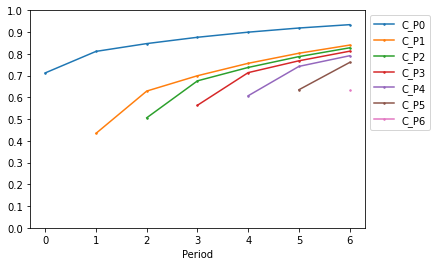

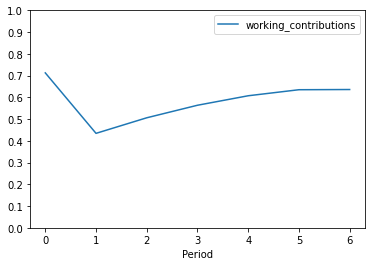

In [88]:

plottest1 = contributioncalc(6, True, "sqrt", True, True)



In [11]:
# Interesting Plots:
# plottest1 = contributioncalc(8, True, "sqrt", True)
# plottest2 = contributioncalc(8, True, "log", False)
# plottest3 = contributioncalc(4, True, "sqrt", False)
# plottest4 = contributioncalc(4, True, "log", False)

    deadline   quality  logquality  sqrtquality  profitslog  profitssqrt  \
0          4  3.200000    1.163151     1.788854    1.033444     1.589374   
1          5  4.937221    1.596803     2.221986    1.377416     1.916705   
2          6  4.857076    1.580437     2.203878    1.323591     1.845713   
3          7  4.689208    1.545264     2.165458    1.256441     1.760716   
4          8  4.387851    1.478840     2.094720    1.167410     1.653591   
5          9  4.023985    1.392273     2.005987    1.067061     1.537422   
6         10  3.603231    1.281831     1.898218    0.953803     1.412452   
7         11  3.087063    1.127220     1.757004    0.814328     1.269297   
8         12  2.507572    0.919315     1.583532    0.644789     1.110657   
9         13  1.893653    0.638508     1.376101    0.434793     0.937058   
10        14  1.155416    0.144460     1.074903    0.095505     0.710637   
11        15  1.000000    0.000000     1.000000    0.000000     0.641862   
12        16

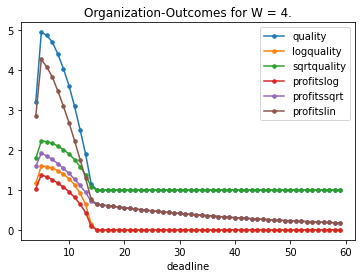

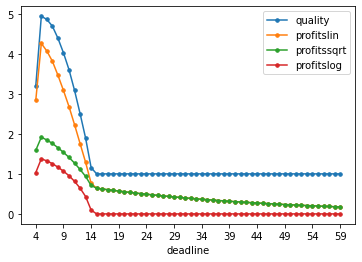

In [12]:
qualitydf = pd.DataFrame()
deadlinelist = []
qualitylist = []

t = int(w) # + 1
b = 60

while t < b:
    quallist = [qualitycalc(i) for i in contributioncalc(t, False, "sqrt", False, False)]
    
    # The minimum of total quality is set equal to 1 in order to ensure fitting graph dimensions
    if sum(quallist) > 1:
        qualsum = sum(quallist)
    else:
        qualsum = 1
    qualitylist += [qualsum]
    deadlinelist += [t]
    t += 1

sqrtquality = [i**0.5 for i in qualitylist]
logquality = [numpy.log(i) for i in qualitylist]

qualitydf['deadline'] = deadlinelist
qualitydf['quality'] = qualitylist
qualitydf['logquality'] = logquality
qualitydf['sqrtquality'] = sqrtquality

rows = len(qualitydf)
profitlist = []
profitlistsq = []
profitslinear = []
f = 0

while f < rows:
    dlin = qualitydf.iloc[f,0]
    lqual = qualitydf.iloc[f,2]
    squal = qualitydf.iloc[f,3]
    linqual = qualitydf.iloc[f,1]
    profitlog = ((1/(r**dlin))*lqual)
    profitsqrt = ((1/(r**dlin))*squal)
    profitslin = ((1/(r**dlin))*linqual)
    profitlist += [profitlog]
    profitlistsq += [profitsqrt]
    profitslinear += [profitslin]
    f += 1

qualitydf['profitslog'] = profitlist
qualitydf['profitssqrt'] = profitlistsq
qualitydf['profitslin'] = profitslinear

qualitydf['quality'] = pd.to_numeric(qualitydf['quality'])



qualitydf.plot(x = 'deadline', marker = '.', markersize = 7, title = f"Organization-Outcomes for W = {w}.").legend(bbox_to_anchor=(1.0, 1.0))

qualitydf.plot(x = 'deadline', y= ['quality', 'profitslin', 'profitssqrt', 'profitslog'], marker = '.', markersize = 7, )#.legend(bbox_to_anchor=(1.0, 1.0)) #title = f"Organization-Outcomes for W = {w}."
plt.xticks(numpy.arange(min(qualitydf["deadline"]), max(qualitydf["deadline"])+1, 5.0))
plt.yticks(numpy.arange(0, max(qualitydf["quality"])+1, 1.0))
plt.savefig("qualityprofitsw4all.png", dpi = 1200)

print(qualitydf)

maxprofit = qualitydf['profitslog'].idxmax()
maxprofitsq = qualitydf['profitssqrt'].idxmax()
optimaldeadlinelog = qualitydf.iloc[maxprofit,0]
optimaldeadlinesqrt = qualitydf.iloc[maxprofitsq,0]

print(f"Log: The optimal Deadline is: {optimaldeadlinelog}, so  {optimaldeadlinelog + 1} Periods.")
print(f"Sqrt: The optimal Deadline is: {optimaldeadlinesqrt}, so {optimaldeadlinesqrt + 1} Periods.")